In [1]:
from pathlib import Path

import joblib
import matplotlib.pyplot as plt

from utils import *

In [2]:
pc = ProjectConfig()

No configuration file found. Using defaults.


In [3]:
base_training_dir = pc.project_root_dir.joinpath("src/model_saves")
base_history_file = base_training_dir.joinpath("efficientnet_v2m_history")
base_history = joblib.load(base_history_file)

fine_tune_dir = pc.project_root_dir.joinpath("src/model_fine_tuned_saves")
fine_tune_history_file = fine_tune_dir.joinpath("efficientnet_v2m_history")
fine_tune_history = joblib.load(fine_tune_history_file)

In [4]:
def plot_loss(history, title):
    min_val_loss = min(history["val_loss"])
    min_val_loss_index = history["val_loss"].index(min_val_loss)
    epochs = range(1, len(history["loss"]) + 1)
    plt.plot(epochs, history["loss"], "b", label="Training loss")
    plt.plot(epochs, history["val_loss"], "r", label="Validation loss")
    plt.axvline(
        x=min_val_loss_index, color="g", linestyle="--", label="Min Validation Loss"
    )
    plt.title(title)
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend(loc="best")
    plt.show()

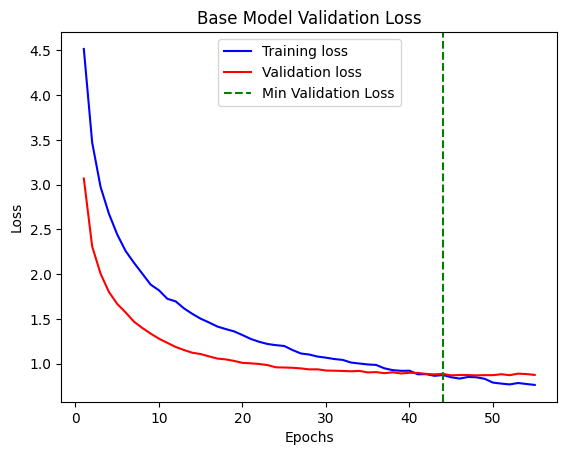

In [5]:
plot_loss(base_history, "Base Model Validation Loss")

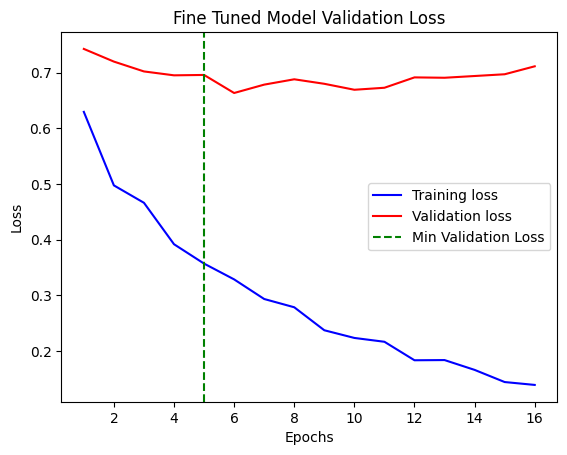

In [6]:
plot_loss(fine_tune_history, "Fine Tuned Model Validation Loss")